## Homework #3. Crowdsourcing tools review
#### Author: Kateryna Steshenko
#### Total time spent on h/w (in minutes): 540

In [60]:
import pandas as pd

In [61]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

In [62]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

## Task 2.1
## Messages data analysis

In [64]:
df.shape

(205577, 10)

In [65]:
min(df["date"]),max(df["date"])

('2018-09-04 15:20:41+00:00', '2022-11-04 02:18:48+00:00')

In [66]:
df.groupby(["type"])["type"].count()

type
photo       10110
sticker      2495
text       187259
video        1254
voice        4459
Name: type, dtype: int64

In [67]:
df.groupby(["type"])["duration"].sum()

type
photo          0.0
sticker        0.0
text           0.0
video      69466.0
voice      83322.0
Name: duration, dtype: float64

## Tasks to do:

1. Define your telegram ID (https://www.alphr.com/telegram-find-user-id/).

In [ ]:
import json

i = 0
j = json.loads(df_meta.at[i, 'users'].replace("None", '""').replace("'", '"'))
while j["phone"] != '380931513597':
    i = i + 1
    j= json.loads(df_meta.at[i, 'users'].replace("None", '""').replace("'", '"'))
myUserId = j["user_id"]
myUserId

2. Check on examples that the data you downloaded reflects your telegram messages. Make screenshots (insert your screenshots in this notebook) of 3 different messages in TG and related rows in your dataset here.

In [ ]:
df2 = df[df["from_id"]==f"PeerUser(user_id={myUserId})"]["message"]
[df2.at[1], df2.at[3], df2.at[20], df2.at[42]]

3. Find the longest audio message you've ever sent; what's its duration? Make its screenshot (insert your screenshots in this notebook).

In [ ]:
allVoice = df[df["type"]=="voice"]
myVoice = allVoice[allVoice["from_id"]==f"PeerUser(user_id={myUserId})"]
myVoice[myVoice["duration"] == max(myVoice["duration"])]

4. Calculate numbers of send and received(s&r) messages.

In [72]:
df[df["to_id"] == myUserId]["id"].count()


115610

In [73]:
df[df["to_id"] != myUserId]["id"].count()

89967

5. Draw number of send and received(s&r) messages per day (x-axis - is date(from min(date) till max(date)), y-axis number of messages). There should be two lines: blue for received red for send.

In [74]:
#!pip install matplotlib

You should consider upgrading via the 'd:\дз\3 курс\css\4hw\telegram-data-collection-master\.venv\scripts\python.exe -m pip install --upgrade pip' command.


In [75]:
import matplotlib.pyplot as plt
import numpy as np

C:\Users\User\AppData\Local\Temp\ipykernel_2576\3252734754.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["DMY"] = convert_times(dfr)
C:\Users\User\AppData\Local\Temp\ipykernel_2576\3252734754.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs["DMY"] = convert_times(dfs)


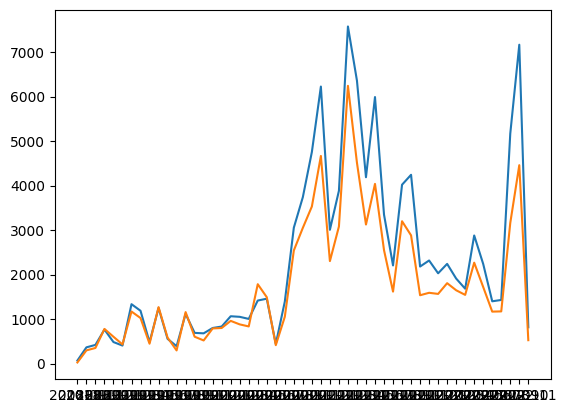

<module 'matplotlib.pyplot' from 'd:\\дз\\3 курс\\css\\4hw\\telegram-data-collection-master\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [78]:

def convert_times(d):
    listT = []
    for t in range(len(d["date"].tolist())):
      listT.append(d["date"].loc[d.index[t]][:7])
    return listT

dfr = df[df["to_id"] == myUserId]
dfr["DMY"] = convert_times(dfr)
dfs = df[df["to_id"] != myUserId]
dfs["DMY"] = convert_times(dfs)
plt.plot(dfr.groupby("DMY")["DMY"].count())
plt.plot(dfs.groupby("DMY")["DMY"].count())
plt.show()
plt

6. Draw a few diagrams to show distributions between post types in the time, a diagram showing the total amount of messages of each type.

C:\Users\User\AppData\Local\Temp\ipykernel_2576\2287117259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft["DMY"] = convert_times(dft)
C:\Users\User\AppData\Local\Temp\ipykernel_2576\2287117259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dft["DMY"] = convert_times(dft)
C:\Users\User\AppData\Local\Temp\ipykernel_2576\2287117259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

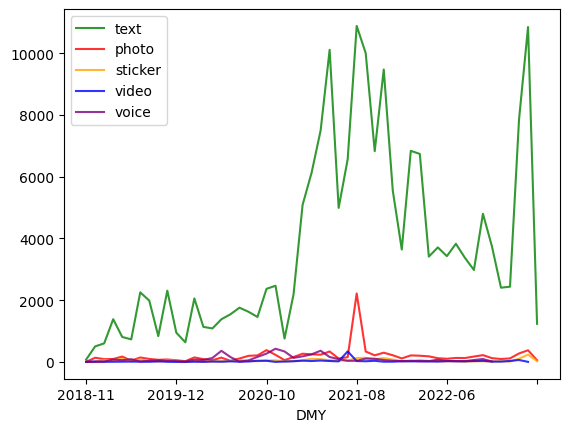

<module 'matplotlib.pyplot' from 'd:\\дз\\3 курс\\css\\4hw\\telegram-data-collection-master\\.venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [104]:
c = 0;
for tp in list(dict.fromkeys(df["type"].tolist())):
    dft = df[df["type"] == tp]
    dft["DMY"] = convert_times(dft)
    dft.groupby("DMY")["DMY"].count().plot(alpha=0.8, color = ["Green", "Red", "Orange", "Blue", "Purple"][c])
    c+=1
plt.legend(list(dict.fromkeys(df["type"].tolist())))
plt.show()
plt

7. Calculate top-10 people to whom you wrote the biggest amount of messages (name, amount of messages).

In [ ]:
dft3 = df.merge(df_meta,  how='inner', on='dialog_id')
dft3[dft3["from_id"]==f"PeerUser(user_id={myUserId})"].groupby(["name"])["name"].count().sort_values(ascending=False).head(10)


8. Calculate top-10 people who wrote the biggest amount of messages to you (name, amount of messages).

In [ ]:
dft8 = df.merge(df_meta,  how='inner', on='dialog_id')
dft8[dft8["from_id"]!=f"PeerUser(user_id={myUserId})"].groupby(["name"])["name"].count().sort_values(ascending=False).head(10)


## Task 2.2
## Dialogs data analysis

In [105]:
df_meta.shape

(10848, 4)

In [107]:
df_meta.groupby(["type"])["type"].count()

type
Channel              97
Group             10380
Private dialog      371
Name: type, dtype: int64

## Tasks to do:

1. Find our TG group. Print its id and list of participants.

In [ ]:
#we have not a group

2. Draw distribution of group sizes.

d:\дз\3 курс\css\4hw\telegram-data-collection-master\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\дз\3 курс\css\4hw\telegram-data-collection-master\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128579 (\N{UPSIDE-DOWN FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\дз\3 курс\css\4hw\telegram-data-collection-master\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129304 (\N{SIGN OF THE HORNS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\дз\3 курс\css\4hw\telegram-data-collection-master\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\дз\3 курс\css\4hw\telegram-data-collection-master\.venv\lib\site-packages\IPython\c

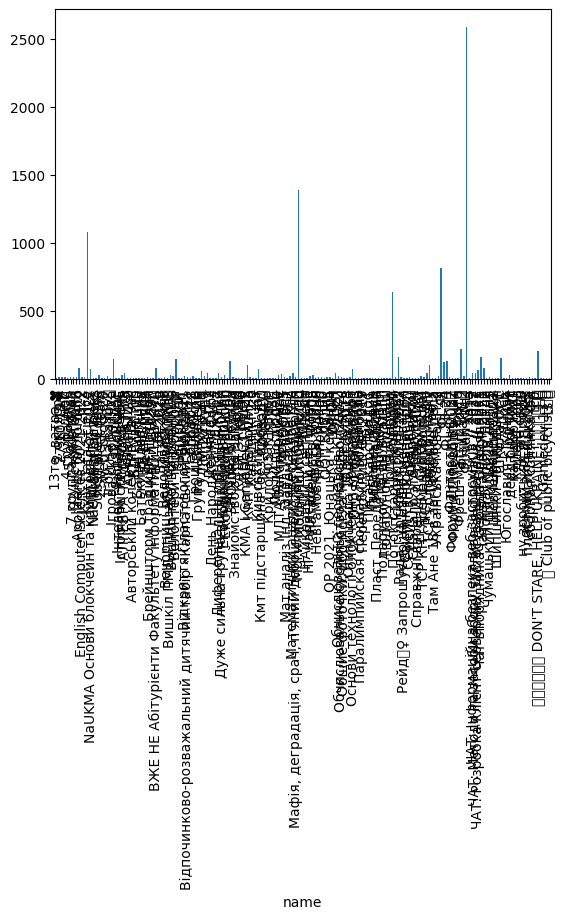

In [118]:
dfg = df_meta[df_meta["type"]=="Group"]
dfg.groupby("name")["name"].count().plot(kind = "bar")
plt.show()

3. Calculate top-10 the biggest groups/channels.

In [ ]:
pd.concat([df_meta[df_meta["type"]=="Group"], df_meta[df_meta["type"]=="Channel"]], ignore_index=True).groupby(["name"])["name"].count().sort_values(ascending=False).head(10)

4. Calculate the number of distinct user names you are connected to through any type of dialogue.

In [171]:

dff = pd.DataFrame()
dff["users"]=df_meta["users"]
dff["type"]=df_meta["type"]
noDuplDF=dff.drop_duplicates()
noDuplDF
len(noDuplDF.groupby("users").filter(lambda x: len(x) == 3))

189